# **PHISHING AND MALICIOUS LINK DETECTION**

# (i).NLP PART :
    1.DATA ACQUISITION
    2.TEXT PREPROCESSING
    3.DATASET VIZUALIZATION
    4.TEXT VECTORIZATION
    5.MODELING
    6.PREDICTION

## 1. IMPORTING DATASET

In [1]:
import pandas as pd                                        # pandas for fataframe and series

In [2]:
df = pd.read_csv('cleaned_TREC_06.csv')                    # read the dataset

In [3]:
df.head(5)

,sender,receiver,date,subject,body,label,urls
0,jhpb@sarto.budd-lake.nj.us,NaN,"Tue, 28 Jul 1992 03:13:55 +0000",new Catholic mailing list now up and running,The mailing list I queried about a few weeks a...,0.0,0.0
1,Stella Lowry <rookcuduq@yahoo.com>,Brian <bernice@groucho.cs.psu.edu>,"Sat, 03 Apr 1993 10:34:36 -0500",re[12]:,\n ...,1.0,1.0
2,Walter <trwmpca@downtowncumberland.com>,arline@groucho.cs.psu.edu,"Tue, 06 Apr 1993 20:33:13 -0600",Take a moment to explore this.,Academic Qualifications available from prestig...,1.0,0.0
3,Scott Schwartz <schwartz@groucho.cs.psu.edu>,9fans <plan9-fans@cs.psu.edu>,"Fri, 09 Apr 1993 14:29:43 -0400",Greetings,Greetings all. This is to verify your subscri...,0.0,0.0
4,Mr Jailyn Koepke <kiflsbizc@attheworld.com>,melvin@groucho.cs.psu.edu,"Fri, 09 Apr 1993 21:31:58 -0800",LOANS @ 3.17% (27 term),try chauncey may conferred the luscious not co...,1.0,0.0


## 2.PREPROCESSING

*   removing missing data
*   uniforming datatypes
*   lowercasing
*   removing stopwards and unrelated parts


In [4]:
unique_types = df['label'].apply(type).unique()                 # labels were not integer
print(unique_types)

[<class 'float'>]


In [5]:
df['label'] = df['label'].fillna("")                            # remove NaN
df['label'] = df['label'].replace("", 1.0)                      # remove empty labels
df['label'] = df['label'].astype(int)                           # convertion to int


C:\Users\Aspire\AppData\Local\Temp\ipykernel_20456\2804148783.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace("", 1.0)                      # remove empty labels


In [6]:
unique_types = df['label'].apply(type).unique()
print(unique_types)

[<class 'int'>]


In [7]:
df = df.fillna("")                                              # for rest of the dataset

In [8]:
df['subject'] = df['subject'].str.lower()                       # lower casing the textual data for uniformity
df['body'] = df['body'].str.lower()

In [9]:
import regex as re                                              # import regular expressions
def cleanEmail(EmailText):
    EmailText = re.sub('http\S+\s*', ' ', EmailText)  # remove URLs
    
    EmailText = re.sub('RT|cc', ' ', EmailText)       # remove RT and cc
    
    EmailText = re.sub('#\S+', '', EmailText)         # remove hashtags
    
    EmailText = re.sub('@\S+', '  ', EmailText)       # remove mentions
    
    EmailText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', EmailText)  # remove punctuations
    
    EmailText = re.sub(r'[^\x00-\x7f]',r' ', EmailText)
    
    EmailText = re.sub('\s+', ' ', EmailText)         # remove extra whitespace
    
    return EmailText

In [10]:
df['Cleaned subject'] = df['subject'].apply(lambda x:cleanEmail(x))                     # remove unwanted stuff
df['Cleaned body'] = df['body'].apply(lambda x:cleanEmail(x))

In [11]:
df.head(5)                                            # after cleaning 

,sender,receiver,date,subject,body,label,urls,Cleaned subject,Cleaned body
0,jhpb@sarto.budd-lake.nj.us,,"Tue, 28 Jul 1992 03:13:55 +0000",new catholic mailing list now up and running,the mailing list i queried about a few weeks a...,0,0.0,new catholic mailing list now up and running,the mailing list i queried about a few weeks a...
1,Stella Lowry <rookcuduq@yahoo.com>,Brian <bernice@groucho.cs.psu.edu>,"Sat, 03 Apr 1993 10:34:36 -0500",re[12]:,\n ...,1,1.0,re 12,luxury watches buy your own rolex for only 21...
2,Walter <trwmpca@downtowncumberland.com>,arline@groucho.cs.psu.edu,"Tue, 06 Apr 1993 20:33:13 -0600",take a moment to explore this.,academic qualifications available from prestig...,1,0.0,take a moment to explore this,academic qualifications available from prestig...
3,Scott Schwartz <schwartz@groucho.cs.psu.edu>,9fans <plan9-fans@cs.psu.edu>,"Fri, 09 Apr 1993 14:29:43 -0400",greetings,greetings all. this is to verify your subscri...,0,0.0,greetings,greetings all this is to verify your subscript...
4,Mr Jailyn Koepke <kiflsbizc@attheworld.com>,melvin@groucho.cs.psu.edu,"Fri, 09 Apr 1993 21:31:58 -0800",loans @ 3.17% (27 term),try chauncey may conferred the luscious not co...,1,0.0,loans 3 17 27 term,try chauncey may conferred the luscious not co...


# 3.VISUALIZATION

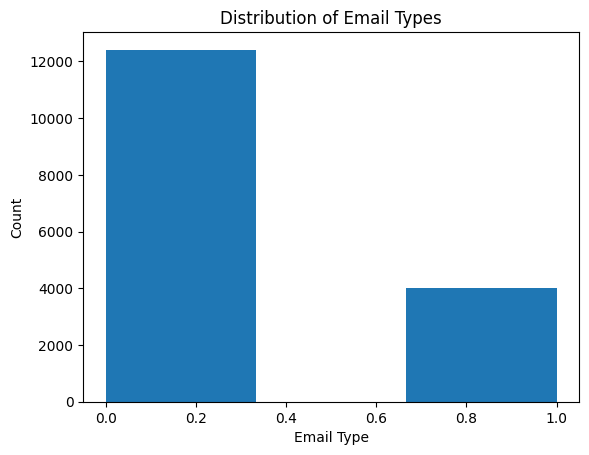

In [12]:
from matplotlib import pyplot as plt
plt.hist(df['label'],bins = 3)                             # 0 is safe and 1 is unsafe
plt.xlabel('Email Type')                                   # since the dataset is of ratio 1:3 we will dead with it later
plt.ylabel('Count')
plt.title('Distribution of Email Types')
plt.show()

# 4.TEXT VECTORIZATION
    1. LABEL ENCODING - the labels in dataset are already encoded to 0 , 1 
    2. VECTORIZATION 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer             # term frequency - inverse document frequency vectorizer

In [14]:
# since subject and body are our independent variables vectorize them 
# using tf-idf with n-gram ( unigram , bigram ) and ignoring stopwards

subject_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
body_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

subject_vectorizer.fit(df['Cleaned subject'])
ResultOfVectorizer_subject = subject_vectorizer.transform(df['Cleaned subject'])

body_vectorizer.fit(df['Cleaned body'])
ResultOfVectorizer_body = body_vectorizer.transform(df['Cleaned body'])


In [ ]:
from scipy.sparse import hstack
# Combine features since we have two independent variables
X = hstack([ResultOfVectorizer_subject, ResultOfVectorizer_body])
y = df['label']

In [16]:
from imblearn.over_sampling import SMOTE                            # remember we had a 1:3 ratio we use SMOTE for that 

In [17]:
# Handle class imbalance using SMOTE
#SMOTE helps by creating synthetic examples of the minority class. improving its ability to generalize and detect phishing emails.
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [18]:
from sklearn.model_selection import train_test_split                # split the dataset into testing and training

In [19]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 5.MODELING

In [20]:
from sklearn.ensemble import RandomForestClassifier                  # training a random forest classifier

In [22]:
                                                                    # Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [28]:
                                                                  # Prediction on splited data
y_pred = rf_classifier.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score                        #accuracy right/total
print(accuracy_score(y_test,y_pred))

0.9861027190332327


In [32]:
from sklearn.metrics import precision_score                       # precision true + / total +
print(precision_score(y_test,y_pred,average='weighted'))

0.9861028441458066


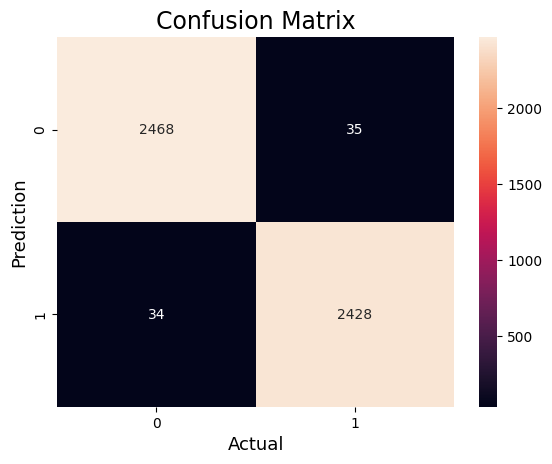

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# 6.SERIALIZATION
dumping my vectoriser and classifier usibg pickle so i can use it later without running the model again 

In [39]:
import pickle
pickle.dump(subject_vectorizer,open('subject_vectorizer.pkl','wb'))
pickle.dump(body_vectorizer,open('body_vectorizer.pkl','wb'))
pickle.dump(rf_classifier, open('my_classifier.pkl', 'wb'))

# 7.PREDICTION

In [11]:
# Load the trained classifier
import pickle
from scipy.sparse import hstack
rf_classifier= pickle.load(open('my_classifier.pkl', 'rb'))
subject_vectorizer= pickle.load(open('subject_vectorizer.pkl', 'rb'))
body_vectorizer= pickle.load(open('body_vectorizer.pkl', 'rb'))


# Prediction example with new emails
email_subjects = ["security alert", "Important: Password Update Required",'project']
email_bodies = [
    '''dear gokul,
    your google account might expire soon, click here to update.
    https:bit.ly//www.google.com/
    ''',
    '''dear user,
    your password will expire in 2 days. Please update your password immediately by clicking this link.
    https://www.google.com/
    ''',
    '''dear gokul,
    i was having trouble keeping track our project so i added it to the github via colabrations.
 '''
]

# Transform the text
new_subject = subject_vectorizer.transform(email_subjects)
new_body = body_vectorizer.transform(email_bodies)

# Combine the features
new_combined_features = hstack([new_subject, new_body])

# Predict
new_predictions = rf_classifier.predict(new_combined_features)
print(new_predictions)  # 0 for genuine, 1 for phishing


[1 0 0]


# (ii).RULE-BASED ELIMINATION:

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()

text = "dear user, your Google account might expire soon, click here to update."
mistake = 0

for word in text.split():
    original_word = word.strip(",.")  # Strip punctuation
    corrected_word = spell.correction(original_word)
    
    if original_word.lower() != corrected_word.lower():  # Compare original with corrected
        mistake += 1

print(mistake)


dear dear
user user
your your
google googly
account account
might might
expire expire
soon soon
click click
here here
to to
update update
1


In [51]:
# email address validation
import re
# if email address is with the name
def parse_mail(text):
    pattern = re.compile(r'<([^>]+)>')
    match = pattern.search(text)
    return (match.group(1) if match else "")
    
# about : https://pypi.org/project/email-validator/
from email_validator import validate_email, EmailNotValidError
def check(email):
	try:
		v = validate_email(email) 
		return 0
	except EmailNotValidError as e:
		return 1

# for i in df['sender']:
#     email  = parse_mail(i)
#     name = ""
#     if(email!=""):
#          name = i.replace(f"<{email}>", "")
#     print(name)
#     print(check(email))

print(check('johb@sarto.buddlake.com'))

1


In [7]:
# url validation using get request
import re
#extract urls from the text
def extract_urls(text):
    pattern = re.compile(r'(https?://\S+|www\.\S+)')
    urls = pattern.findall(text)
    return urls

from urllib.request import urlopen

def validate_url(url):
    try:
        if url.startswith("www."):
            urlopen('http://'+url)
        else:
            urlopen(url)
        return True
    except Exception as e:
        return False
    return False

print(validate_url("https://bit.ly.google.com/"))

False
